<a href="https://colab.research.google.com/github/nise1301/NBA_stats/blob/main/NBA_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise NBA: A Altura Importa?

**Pergunta Central:** *A altura dos jogadores influencia seu sucesso na NBA?*

Nesta análise exploraremos como a altura se relaciona com:
- **Chance de ser draftado** (entrada na NBA)
- **Salário** (valor financeiro)
- **Performance** (eficiência vs volume)
- **Especialização por posição**

---

## 1. Configuração e Carregamento dos Dados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações visuais
plt.rcParams['figure.figsize'] = (10, 6)
sns.set_style("whitegrid")

In [ ]:
# Carregar dados
df = pd.read_csv('nba_stats.csv')
print(f"Dataset carregado: {len(df):,} registros")
print(f"Colunas: {list(df.columns)}")

Dataset carregado: 8,162 registros
Colunas: ['year', 'name', 'playerId', 'playerSlug', 'positionId', 'teamId', 'status', 'gamesPlayed', 'avgMinutes', 'avgFouls', 'flagrantFouls', 'technicalFouls', 'ejections', 'doubleDouble', 'tripleDouble', 'minutes', 'rebounds', 'fouls', 'avgRebounds', 'avgPoints', 'avgFieldGoalsMade', 'avgFieldGoalsAttempted', 'fieldGoalPct', 'avgThreePointFieldGoalsMade', 'avgThreePointFieldGoalsAttempted', 'threePointFieldGoalPct', 'avgFreeThrowsMade', 'avgFreeThrowsAttempted', 'freeThrowPct', 'avgAssists', 'avgTurnovers', 'points', 'fieldGoalsMade', 'fieldGoalsAttempted', 'threePointFieldGoalsMade', 'threePointFieldGoalsAttempted', 'freeThrowsMade', 'freeThrowsAttempted', 'assists', 'turnovers', 'avgSteals', 'avgBlocks', 'steals', 'blocks', 'position', 'birthdate', 'college', 'draftinfo', 'birthplace', 'team', 'htwt', 'experience', 'rankingSalary', 'salary']


## 2. Exploração Inicial

In [ ]:
# Verificação básica
print("INFORMAÇÕES BÁSICAS:")
print(f"• Registros: {len(df):,}")
print(f"• Valores ausentes: {df.isnull().sum().sum():,}")
print(f"• Duplicatas: {df.duplicated().sum():,}")
print(f"\nPREVIEW DOS DADOS:")
df.head(3)

INFORMAÇÕES BÁSICAS:
• Registros: 8,162
• Valores ausentes: 20,392
• Duplicatas: 0

PREVIEW DOS DADOS:


,year,name,playerId,playerSlug,positionId,teamId,status,gamesPlayed,avgMinutes,avgFouls,...,position,birthdate,college,draftinfo,birthplace,team,htwt,experience,rankingSalary,salary
0,1999,Allen Iverson,366,allen-iverson,SG,PHI,inactive,48.0,41.458332,2.041667,...,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,15,"$9,000,000"
1,2000,Allen Iverson,366,allen-iverson,SG,PHI,inactive,70.0,40.757140,2.314286,...,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,27,"$10,125,000"
2,2001,Allen Iverson,366,allen-iverson,SG,PHI,inactive,71.0,41.957745,2.070423,...,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,17,"$11,250,000"


## 3. Preparação e Limpeza dos Dados

In [ ]:
def converter_altura(altura_str):
    """Converte altura de '6\' 11"' para pés decimais"""
    if pd.isna(altura_str):
        return np.nan
    try:
        parts = str(altura_str).replace('"', '').split("'")
        if len(parts) == 2:
            pes = float(parts[0].strip())
            polegadas = float(parts[1].strip())
            return round(pes + polegadas/12, 2)
    except:
        return np.nan

def converter_salario(salary_str):
    """Converte salário de '$1,000,000' para float"""
    if pd.isna(salary_str):
        return np.nan
    try:
        return float(str(salary_str).replace('$', '').replace(',', ''))
    except:
        return np.nan

In [ ]:
# Preparar dados
df[['altura_raw', 'peso_raw']] = df['htwt'].str.split(', ', expand=True)
df['altura_pes'] = df['altura_raw'].apply(converter_altura)
df['salary_num'] = df['salary'].apply(converter_salario)

# Filtrar dados válidos (1 registro por jogador)
dados = df.dropna(subset=['altura_pes', 'salary_num']).drop_duplicates(subset=['name'], keep='last')

print(f"Dados preparados: {len(dados):,} jogadores únicos")
print(f"Altura média: {dados['altura_pes'].mean():.2f} pés")
print(f"Salário médio: ${dados['salary_num'].mean():,.0f}")

Dados preparados: 433 jogadores únicos
Altura média: 6.56 pés
Salário médio: $9,664,662


## 4. Bússola: Mapa de Correlações

**Vamos começar com uma visão geral!** Este heatmap nos orienta sobre quais relações são mais fortes e merecem investigação detalhada.

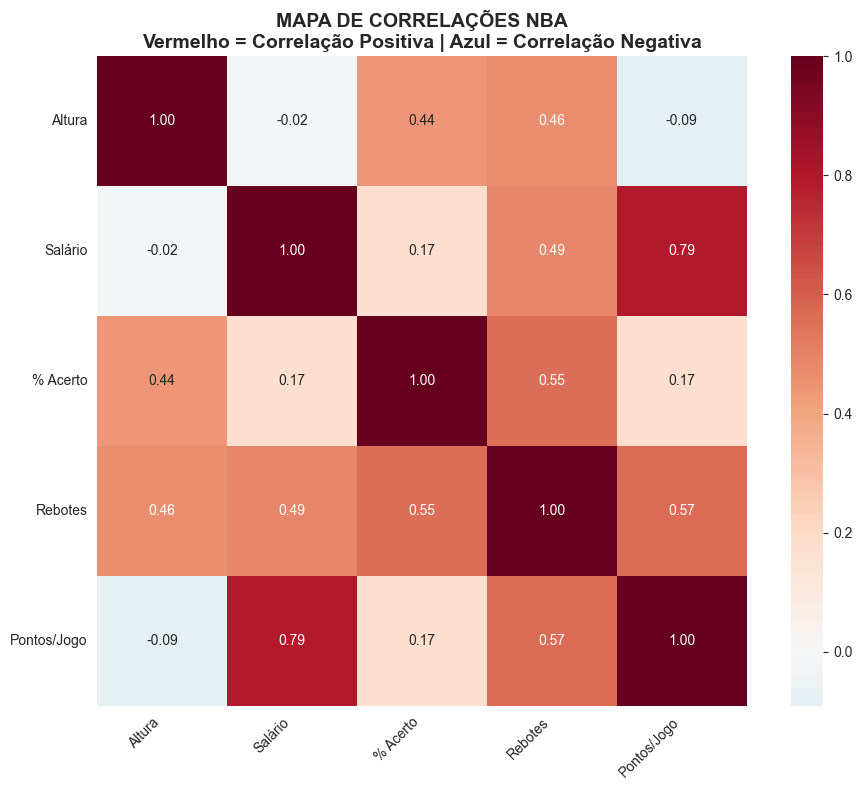

PRINCIPAIS DESCOBERTAS SOBRE ALTURA:
• vs Salário: -0.02 (FRACA)
• vs % Acertos: 0.44 (MODERADA)
• vs Rebotes: 0.46 (MODERADA)
• vs Pontos: -0.09 (FRACA-NEGATIVA)

A altura influencia ESPECIALIZAÇÃO, não valor geral!


In [ ]:
# Heatmap de correlações - BÚSSOLA da análise
variaveis_principais = {
    'altura_pes': 'Altura',
    'salary_num': 'Salário',
    'fieldGoalPct': '% Acerto',
    'avgRebounds': 'Rebotes',
    'avgPoints': 'Pontos/Jogo'
}

# Dados limpos para correlação
dados_correlacao = dados[list(variaveis_principais.keys())].dropna()
correlacoes = dados_correlacao.corr()

# Criar heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlacoes,
           annot=True,
           cmap='RdBu_r',
           center=0,
           fmt='.2f',
           square=True,
           xticklabels=list(variaveis_principais.values()),
           yticklabels=list(variaveis_principais.values()))

plt.title('MAPA DE CORRELAÇÕES NBA\nVermelho = Correlação Positiva | Azul = Correlação Negativa',
          fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print(f"PRINCIPAIS DESCOBERTAS SOBRE ALTURA:")
print(f"• vs Salário: {correlacoes.loc['altura_pes', 'salary_num']:.2f} (FRACA)")
print(f"• vs % Acertos: {correlacoes.loc['altura_pes', 'fieldGoalPct']:.2f} (MODERADA)")
print(f"• vs Rebotes: {correlacoes.loc['altura_pes', 'avgRebounds']:.2f} (MODERADA)")
print(f"• vs Pontos: {correlacoes.loc['altura_pes', 'avgPoints']:.2f} (FRACA-NEGATIVA)")
print(f"\nA altura influencia ESPECIALIZAÇÃO, não valor geral!")

## 5. Altura vs Draft: A Porta de Entrada

**Primeira pergunta:** *Ser alto facilita entrar na NBA?*

In [ ]:
# Análise Draft vs Altura
dados['foi_draftado'] = dados['draftinfo'].notna()

# Estatísticas básicas
draftados = dados[dados['foi_draftado']]
nao_draftados = dados[~dados['foi_draftado']]

altura_draftados = draftados['altura_pes'].mean()
altura_nao_draftados = nao_draftados['altura_pes'].mean()
diferenca_draft = altura_draftados - altura_nao_draftados

print("ALTURA vs DRAFT:")
print("=" * 25)
print(f"• Draftados: {len(draftados):,} jogadores ({altura_draftados:.2f} pés)")
print(f"• Não-draftados: {len(nao_draftados):,} jogadores ({altura_nao_draftados:.2f} pés)")
print(f"• Diferença: +{diferenca_draft:.2f} pés para draftados")
print(f"\n{'Altura FACILITA o draft!' if diferenca_draft > 0 else 'Altura NÃO facilita o draft'}")

ALTURA vs DRAFT:
• Draftados: 356 jogadores (6.57 pés)
• Não-draftados: 77 jogadores (6.51 pés)
• Diferença: +0.07 pés para draftados

Altura FACILITA o draft!


C:\Users\nise_\AppData\Local\Temp\ipykernel_30792\4183939074.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  draft_por_altura = dados.groupby('faixa_altura')['foi_draftado'].agg(['count', 'mean']).reset_index()


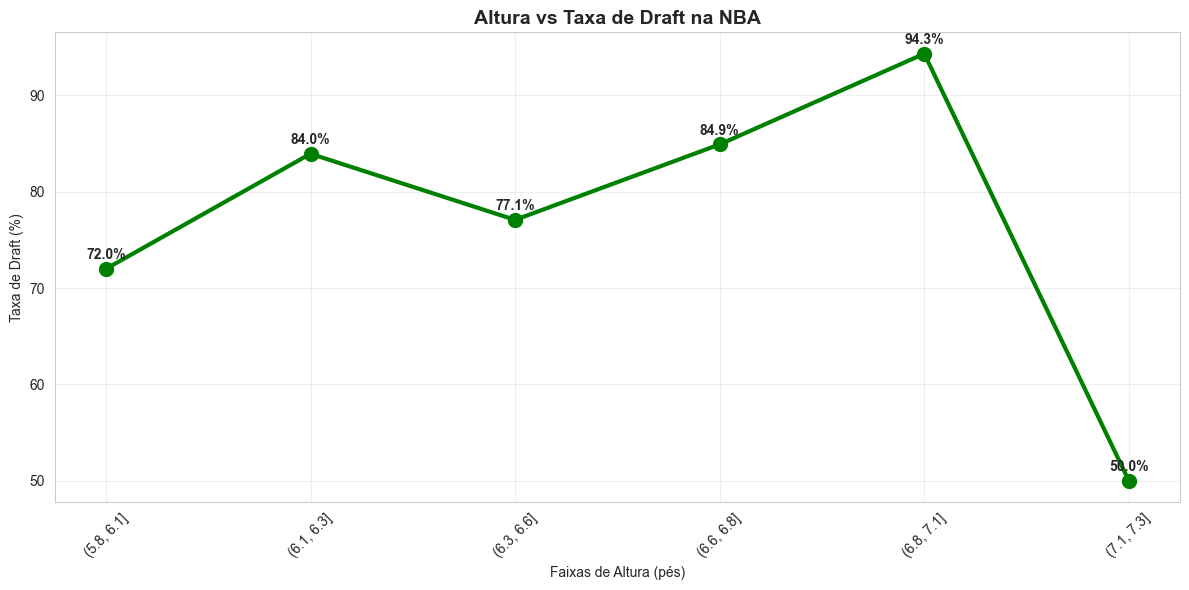

CONCLUSÃO: Altura oferece 44.3% de vantagem no draft


In [ ]:
# Gráfico: Taxa de Draft por Altura - PADRONIZADO (6 faixas)
dados['faixa_altura'] = pd.cut(dados['altura_pes'], bins=6, precision=1)
draft_por_altura = dados.groupby('faixa_altura')['foi_draftado'].agg(['count', 'mean']).reset_index()
draft_por_altura.columns = ['faixa_altura', 'total', 'taxa_draft']

plt.figure(figsize=(12, 6))
faixas = [str(f) for f in draft_por_altura['faixa_altura']]
taxas = draft_por_altura['taxa_draft'] * 100

plt.plot(range(len(faixas)), taxas, marker='o', linewidth=3, markersize=10, color='green')
plt.xlabel('Faixas de Altura (pés)')
plt.ylabel('Taxa de Draft (%)')
plt.title('Altura vs Taxa de Draft na NBA', fontsize=14, fontweight='bold')
plt.xticks(range(len(faixas)), faixas, rotation=45)
plt.grid(True, alpha=0.3)

# Valores nos pontos
for i, valor in enumerate(taxas):
    plt.text(i, valor + 1, f'{valor:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"CONCLUSÃO: Altura oferece {taxas.max() - taxas.min():.1f}% de vantagem no draft")

## 6. Altura vs Salário: O Valor Real

**Segunda pergunta:** *Ser alto significa ganhar mais?*

In [ ]:
# Correlação altura-salário
correlacao_salario = dados['altura_pes'].corr(dados['salary_num'])

print("ALTURA vs SALÁRIO:")
print("=" * 25)
print(f"• Correlação: {correlacao_salario:.3f}")
print(f"• R²: {correlacao_salario**2:.1%} (variância explicada)")

if abs(correlacao_salario) < 0.1:
    interpretacao = "MUITO FRACA"
elif abs(correlacao_salario) < 0.3:
    interpretacao = "FRACA"
else:
    interpretacao = "MODERADA"

print(f"• Força: {interpretacao}")
print(f"\nCONCLUSÃO: Altura tem impacto {interpretacao.split()[0].lower()} no salário")

ALTURA vs SALÁRIO:
• Correlação: -0.021
• R²: 0.0% (variância explicada)
• Força: MUITO FRACA

CONCLUSÃO: Altura tem impacto muito no salário


C:\Users\nise_\AppData\Local\Temp\ipykernel_30792\518071840.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salario_por_altura = dados.groupby('faixa_altura')['salary_num'].mean().reset_index()


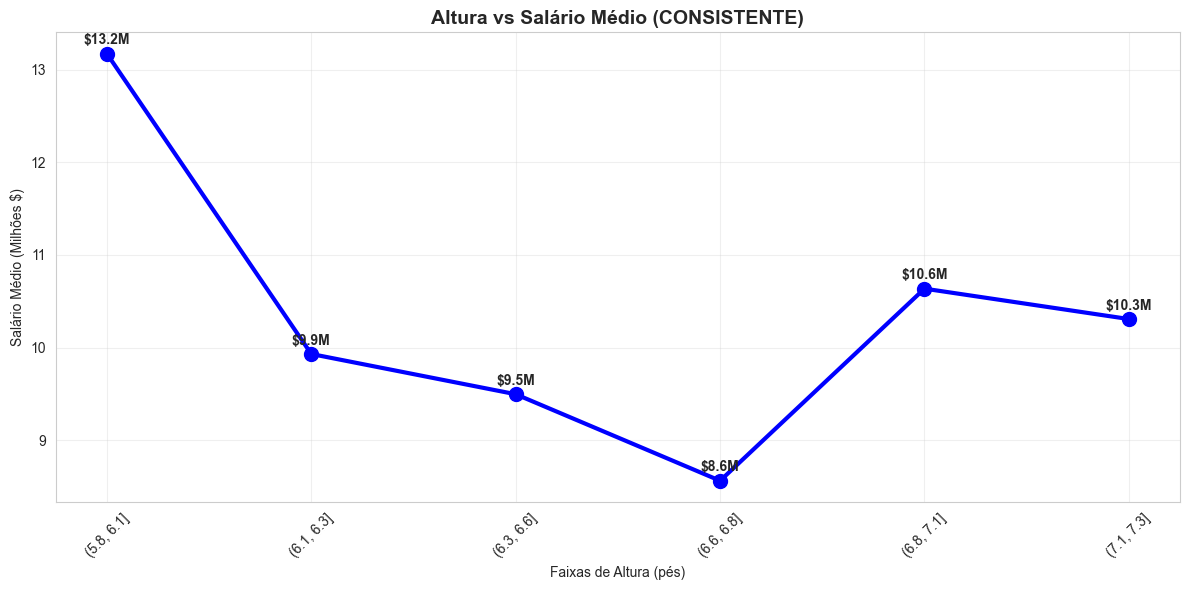

Variação salarial entre faixas: $4.6M (pequena)


In [ ]:
# Gráfico: Salário médio por faixa de altura - PADRONIZADO (6 faixas)
# Usar faixas consistentes com o draft
salario_por_altura = dados.groupby('faixa_altura')['salary_num'].mean().reset_index()

plt.figure(figsize=(12, 6))
faixas_sal = [str(f) for f in salario_por_altura['faixa_altura']]
salarios_medios = salario_por_altura['salary_num'] / 1e6  # Milhões

plt.plot(range(len(faixas_sal)), salarios_medios, marker='o', linewidth=3, markersize=10, color='blue')
plt.xlabel('Faixas de Altura (pés)')
plt.ylabel('Salário Médio (Milhões $)')
plt.title('Altura vs Salário Médio (CONSISTENTE)', fontsize=14, fontweight='bold')
plt.xticks(range(len(faixas_sal)), faixas_sal, rotation=45)
plt.grid(True, alpha=0.3)

# Valores nos pontos
for i, valor in enumerate(salarios_medios):
    plt.text(i, valor + 0.1, f'${valor:.1f}M', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

variacao_salario = salarios_medios.max() - salarios_medios.min()
print(f"Variação salarial entre faixas: ${variacao_salario:.1f}M (pequena)")

## 7. O Paradoxo da Altura: Eficiência vs Volume

**Descoberta surpreendente:** Jogadores altos são mais eficientes nos arremessos, mas jogadores baixos pontuam mais por jogo!

C:\Users\nise_\AppData\Local\Temp\ipykernel_30792\1985528051.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  paradoxo = dados_completos.groupby('faixa_altura_paradoxo').agg({


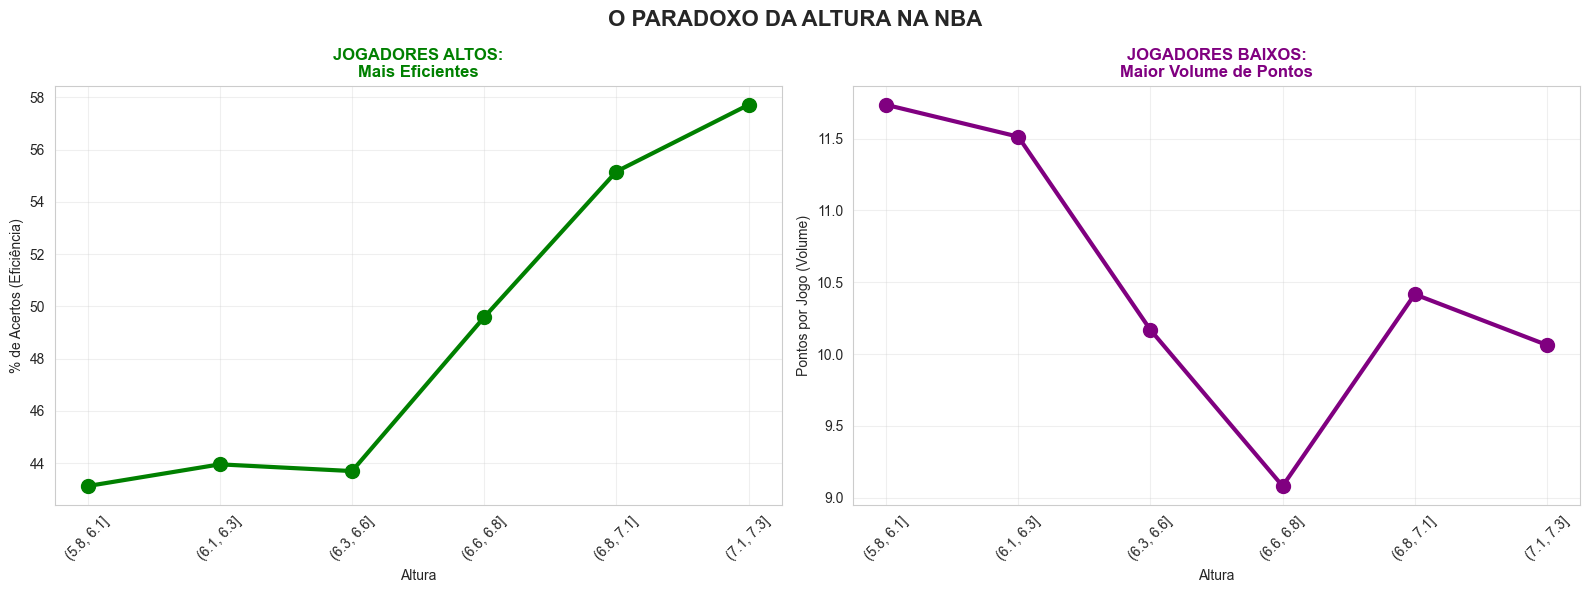

PARADOXO REVELADO:
Eficiência: +14.6% (altos > baixos)
Volume: -2.7 pts/jogo (baixos > altos)

CADA ALTURA TEM SUA ESPECIALIDADE!


In [ ]:
# Preparar dados para o paradoxo - PADRONIZADO (6 faixas)
dados_completos = dados.dropna(subset=['altura_pes', 'fieldGoalPct', 'avgPoints'])
# Usar as mesmas faixas já criadas para consistência
dados_completos['faixa_altura_paradoxo'] = pd.cut(dados_completos['altura_pes'], bins=6, precision=1)

# Calcular médias por faixa
paradoxo = dados_completos.groupby('faixa_altura_paradoxo').agg({
    'fieldGoalPct': 'mean',    # Eficiência
    'avgPoints': 'mean'        # Volume
}).reset_index()

# Visualização do paradoxo
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

faixas_paradoxo = [str(f) for f in paradoxo['faixa_altura_paradoxo']]
eficiencia = paradoxo['fieldGoalPct']
volume = paradoxo['avgPoints']

# Gráfico 1: Eficiência (crescente com altura)
ax1.plot(range(len(faixas_paradoxo)), eficiencia, marker='o', linewidth=3, markersize=10, color='green')
ax1.set_xlabel('Altura')
ax1.set_ylabel('% de Acertos (Eficiência)')
ax1.set_title('JOGADORES ALTOS:\nMais Eficientes', fontweight='bold', color='green')
ax1.set_xticks(range(len(faixas_paradoxo)))
ax1.set_xticklabels(faixas_paradoxo, rotation=45)
ax1.grid(True, alpha=0.3)

# Gráfico 2: Volume (decrescente com altura)
ax2.plot(range(len(faixas_paradoxo)), volume, marker='o', linewidth=3, markersize=10, color='purple')
ax2.set_xlabel('Altura')
ax2.set_ylabel('Pontos por Jogo (Volume)')
ax2.set_title('JOGADORES BAIXOS:\nMaior Volume de Pontos', fontweight='bold', color='purple')
ax2.set_xticks(range(len(faixas_paradoxo)))
ax2.set_xticklabels(faixas_paradoxo, rotation=45)
ax2.grid(True, alpha=0.3)

plt.suptitle('O PARADOXO DA ALTURA NA NBA', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("PARADOXO REVELADO:")
print("=" * 30)
print(f"Eficiência: +{eficiencia.max() - eficiencia.min():.1f}% (altos > baixos)")
print(f"Volume: -{volume.max() - volume.min():.1f} pts/jogo (baixos > altos)")
print(f"\nCADA ALTURA TEM SUA ESPECIALIDADE!")

## 8. Altura por Posição: Contexto Tático

**Última análise:** Como a altura se distribui por posições?

C:\Users\nise_\AppData\Local\Temp\ipykernel_30792\1967678569.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot([dados_posicao[dados_posicao['position'] == pos]['altura_pes']


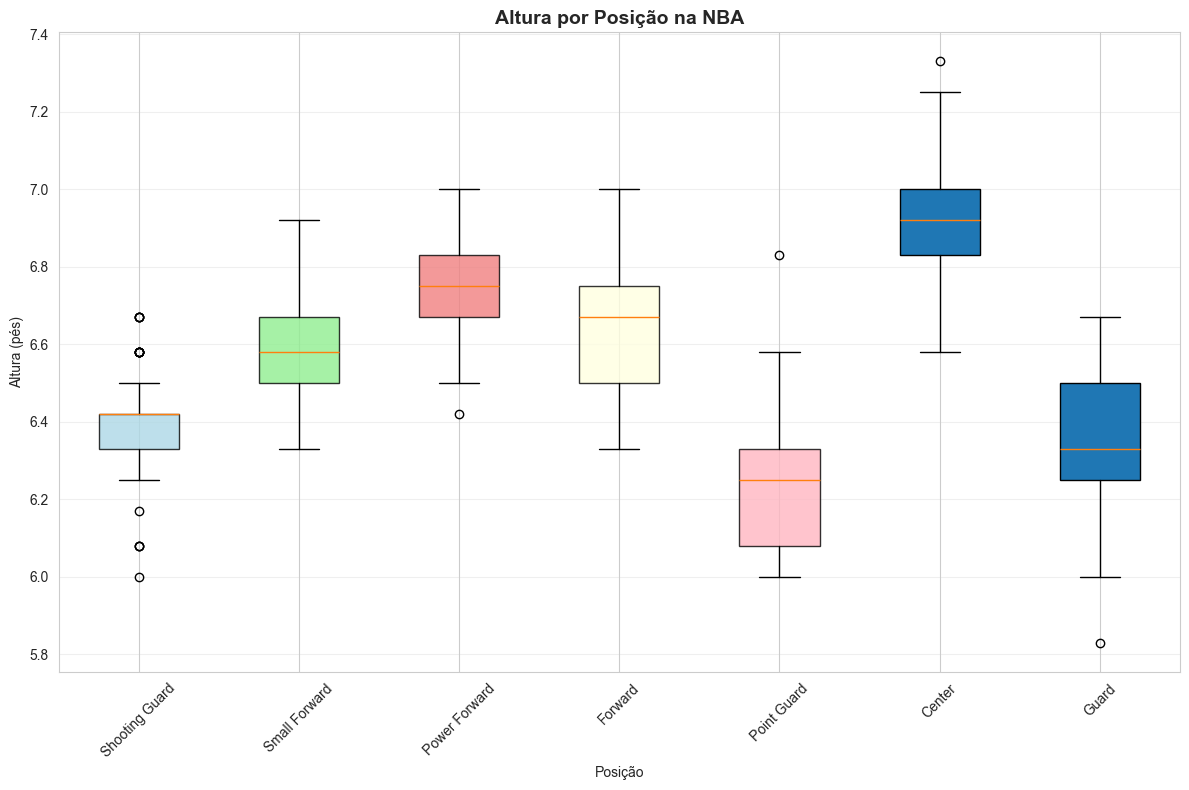

In [ ]:
# Boxplot simplificado por posição
dados_posicao = dados.dropna(subset=['altura_pes', 'position'])

plt.figure(figsize=(12, 8))
bp = plt.boxplot([dados_posicao[dados_posicao['position'] == pos]['altura_pes']
                  for pos in dados_posicao['position'].unique()],
                 labels=dados_posicao['position'].unique(),
                 patch_artist=True)

# Cores por posição
cores_posicao = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightpink']
for patch, cor in zip(bp['boxes'], cores_posicao[:len(bp['boxes'])]):
    patch.set_facecolor(cor)
    patch.set_alpha(0.8)

plt.xlabel('Posição')
plt.ylabel('Altura (pés)')
plt.title('Altura por Posição na NBA', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

In [ ]:
# Resumo estatístico SIMPLES por posição
resumo_posicoes = dados_posicao.groupby('position')['altura_pes'].agg([
    'count', 'mean', 'std'
]).round(2)

resumo_posicoes.columns = ['Jogadores', 'Altura_Média', 'Variação']
resumo_posicoes = resumo_posicoes.sort_values('Altura_Média')

print("RESUMO POR POSIÇÃO:")
print("=" * 35)
print(resumo_posicoes)

# Insights principais
pos_mais_alta = resumo_posicoes.index[-1]
pos_mais_baixa = resumo_posicoes.index[0]
diferenca_posicoes = resumo_posicoes['Altura_Média'].max() - resumo_posicoes['Altura_Média'].min()

print(f"\nPRINCIPAIS INSIGHTS:")
print(f"• Posição mais alta: {pos_mais_alta} ({resumo_posicoes.loc[pos_mais_alta, 'Altura_Média']:.2f} pés)")
print(f"• Posição mais baixa: {pos_mais_baixa} ({resumo_posicoes.loc[pos_mais_baixa, 'Altura_Média']:.2f} pés)")
print(f"• Diferença entre posições: {diferenca_posicoes:.2f} pés")
print(f"• Altura define ESPECIALIZAÇÃO tática na NBA")

RESUMO POR POSIÇÃO:
                Jogadores  Altura_Média  Variação
position                                         
Point Guard            65          6.25      0.18
Guard                  34          6.36      0.19
Shooting Guard         84          6.40      0.13
Small Forward          66          6.59      0.12
Forward                46          6.64      0.15
Power Forward          70          6.73      0.13
Center                 68          6.92      0.14

PRINCIPAIS INSIGHTS:
• Posição mais alta: Center (6.92 pés)
• Posição mais baixa: Point Guard (6.25 pés)
• Diferença entre posições: 0.67 pés
• Altura define ESPECIALIZAÇÃO tática na NBA


## Conclusão Final: A Altura Importa?

### **RESPOSTA: SIM, mas de forma COMPLEXA!**

**O que descobrimos:**

1. **OPORTUNIDADE (Draft):**
   - Altura facilita a entrada na NBA
   - Diferença significativa entre draftados e não-draftados

2. **VALOR FINANCEIRO (Salário):**
   - Correlação FRACA entre altura e salário
   - Altura não garante sucesso financeiro

3. **ESPECIALIZAÇÃO (Performance):**
   - **Jogadores ALTOS**: Mais eficientes, especialistas em rebotes
   - **Jogadores BAIXOS**: Maior volume de pontos, mais versáteis

4. **CONTEXTO TÁTICO:**
   - Cada posição tem seu padrão de altura
   - Altura determina especialização, não valor absoluto

### **INSIGHT PRINCIPAL:**
**A altura importa para ESPECIALIZAÇÃO e OPORTUNIDADE, mas não determina SUCESSO FINAL na NBA. Cada jogador deve maximizar suas características físicas únicas!**